In [3]:
# Load the data
prediction_file = '../artifacts/bbc-news/predictions.txt'

import pandas as pd
df = pd.read_csv(prediction_file)
df[0:5]

,text,target,prediction,business__proba,entertainment__proba,politics__proba,sport__proba,tech__proba
0,UK economy facing 'major risks'\n\nThe UK manu...,business,business,0.992847,0.000000,0.007153,0.000000,0.000000
1,Aids and climate top Davos agenda\n\nClimate c...,business,business,0.587292,0.000000,0.382856,0.000000,0.029852
2,Asian quake hits European shares\n\nShares in ...,business,business,1.000000,0.000000,0.000000,0.000000,0.000000
3,India power shares jump on debut\n\nShares in ...,business,business,0.942380,0.016675,0.000000,0.000000,0.040946
4,Lacroix label bought by US firm\n\nLuxury good...,business,business,0.818217,0.098929,0.005648,0.013764,0.063442


In [9]:
# Check misclassifications (real vs. predicted)

df_miss = df[df.target != df.prediction]
print("No. of misclassifications:", len(df[df.target != df.prediction]))

df_miss

No. of misclassifications: 7


,text,target,prediction,business__proba,entertainment__proba,politics__proba,sport__proba,tech__proba
174,US bank boss hails 'genius' Smith\n\nUS Federa...,business,entertainment,0.268043,0.273344,0.221956,0.144488,0.092169
295,"McDonald's to sponsor MTV show\n\nMcDonald's, ...",business,entertainment,0.407516,0.518301,0.000000,0.000000,0.074183
935,Report attacks defence spending\n\nThe Ministr...,politics,business,0.380708,0.087784,0.267313,0.113809,0.150387
1217,'Super union' merger plan touted\n\nTwo of Bri...,politics,business,0.366874,0.144755,0.342020,0.126069,0.020282
1286,'Super union' merger plan touted\n\nTwo of Bri...,politics,business,0.366874,0.144755,0.342020,0.126069,0.020282
1996,UK pioneers digital film network\n\nThe world'...,tech,entertainment,0.000000,0.512076,0.000000,0.000000,0.487924
2137,Poles play with GameBoy 'blip-pop'\n\nA group ...,tech,entertainment,0.000000,0.535660,0.000000,0.023870,0.440470


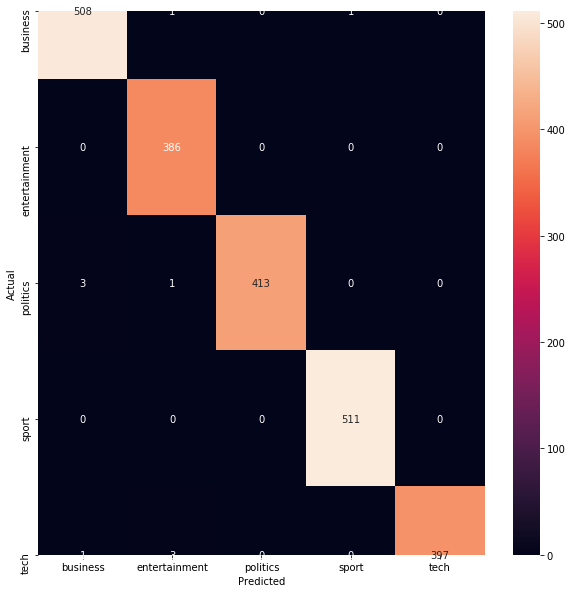

In [16]:
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

model_file = os.path.join(os.path.dirname(prediction_file), 'bbc-news.skl')
model = joblib.load(model_file)
conf_mat_path = os.path.join(os.path.dirname(prediction_file), 'confusion_matrix.pkl')
conf_mat = joblib.load(conf_mat_path)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(
    conf_mat, annot=True, fmt='d',
    xticklabels=model.classes_, yticklabels=model.classes_
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()